<a href="https://colab.research.google.com/github/raishagun/Election-Prediction/blob/master/StatewisePolitics/Punjab/Congress_Punjab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/raishagun/Election-Prediction.git

Cloning into 'Election-Prediction'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 595 (delta 79), reused 0 (delta 0), pack-reused 415
Receiving objects: 100% (595/595), 29.16 MiB | 19.25 MiB/s, done.
Resolving deltas: 100% (246/246), done.


In [2]:
import tweepy 
import pandas as pd
from tweepy import OAuthHandler


access_token="1289037463684489217-5PddOsmU9h5deRwOhdigvhg32FEgID"
access_token_secret="cAPevFduWkiNP3juu8WGAwZm69vgv8C4s8RPz0WE8MJFK"

consumer_key="DLhoHkK6uOGz3Ni9ybuoruiLm"
consumer_secret="jKyrDR68msnbmgZMNNJdSJwadGoed11imKV1jdlNYNczL9HvEk"

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  # authentication of access token and secret 
auth.set_access_token(access_token, access_token_secret) 
api = tweepy.API(auth,wait_on_rate_limit = True)


date1 = "2020-11-01"  #Date from which you need to extract tweets
date2 = "2020-11-22"  #Date till when you need to extract tweets

date =[]
user_id = []
verified = []
text = []
user = []
location = []
source = []
likes = []
followers = []
following = []
retweets = []

def get_tweets(date1,date2,word):
    count = 0
    for tweet in tweepy.Cursor(api.search , q=word,count =1000,lang="en",since_id = date1,until = date2,tweet_mode = 'extended').items():
        print(tweet.created_at)  #Date at which it was tweet
        date.append(tweet.created_at)
        print(tweet.id)          #Unique ID of tweet
        user_id.append(tweet.id)
        print(tweet.user.verified)   #If user who tweet is verified or not
        verified.append(tweet.user.verified)
        print(tweet.full_text)   #To get full text of the tweet
        text.append(tweet.full_text)
        print(tweet.user.screen_name)  #User screen name
        user.append(tweet.user.screen_name)
        print(tweet.user.location)     #Location from where the tweet came
        location.append(tweet.user.location)
        print(tweet.source)            #Which twitter application was used to tweet
        source.append(tweet.source)
        print(tweet.favorite_count)     #Number of likes on the tweet
        likes.append(tweet.favorite_count)
        print(tweet.user.followers_count)    #Number of followers of the user
        followers.append(tweet.user.followers_count)
        print(tweet.user.friends_count)      #Number of following by the user
        following.append(tweet.user.friends_count)
        print(tweet.retweet_count)               #Number of the retweets of the original tweet
        retweets.append(tweet.retweet_count)
    
        print('<--------------------------------------------------->')
        count+=1
        print(count)
    
get_tweets(date1,date2,"congress Punjab"+" -filter:retweets") #Filtering out retweets to avoid duplication

data = list(zip(date,user_id,verified,text,user,location,source,likes,followers,following,retweets))
df = pd.DataFrame(data =data, columns =["Date","Tweet_id","Verified","Tweet",
                                   "User","Location","Source","Likes","Followers","Following","Retweets"])

           
df.to_csv('Congress_Punjab.csv',index = False)

Streaming output truncated to the last 5000 lines.
0
<--------------------------------------------------->
125
2020-11-20 11:13:10
1329744591008931841
False
Congress just to protect the image of then led Rajiv Gandhi’s government didn’t impeach a corrupt Chief Justice of Punjab and Haryana High Court - Justice V Ramaswami, who reportedly spent a hefty amount for his official residence.#CongressKilledJudiciary
Sudipta32037609
Barrackpur, Kolkata
Twitter for Android
0
63
204
0
<--------------------------------------------------->
126
2020-11-20 11:12:44
1329744481105559552
False
-Congress just to protect the image of then led Rajiv Gandhi’s government didn’t impeach a corrupt Chief Justice of Punjab and Haryana High Court - Justice V Ramaswami, who reportedly spent a hefty amount for his official residence.#CongressKilledJudiciary
Biswaji06620242

Twitter for Android
0
52
37
2
<--------------------------------------------------->
127
2020-11-20 11:11:20
1329744129589268481
False
#Congres

In [3]:
import re
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import datetime as dt
from collections import Counter

import nltk
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       479 non-null    datetime64[ns]
 1   Tweet_id   479 non-null    int64         
 2   Verified   479 non-null    bool          
 3   Tweet      479 non-null    object        
 4   User       479 non-null    object        
 5   Location   479 non-null    object        
 6   Source     479 non-null    object        
 7   Likes      479 non-null    int64         
 8   Followers  479 non-null    int64         
 9   Following  479 non-null    int64         
 10  Retweets   479 non-null    int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(4)
memory usage: 38.0+ KB


In [5]:
df.shape

(479, 11)

In [6]:
df['Date'] = df['Date'].apply(lambda x: dt.datetime.strptime(str(x),'%Y-%m-%d %H:%M:%S')) #Convert to date time format

In [7]:
df.dtypes

Date         datetime64[ns]
Tweet_id              int64
Verified               bool
Tweet                object
User                 object
Location             object
Source               object
Likes                 int64
Followers             int64
Following             int64
Retweets              int64
dtype: object

In [8]:
df.isnull().sum()

Date         0
Tweet_id     0
Verified     0
Tweet        0
User         0
Location     0
Source       0
Likes        0
Followers    0
Following    0
Retweets     0
dtype: int64

In [10]:
df['Source'].value_counts()

Twitter for Android     284
Twitter Web App         112
Twitter for iPhone       60
TweetDeck                11
IFTTT                     3
Twitter for iPad          3
Twitter Media Studio      2
Tweepsmap                 1
PB Update                 1
Hootsuite Inc.            1
IAmPunjab Twitter         1
Name: Source, dtype: int64

In [11]:
df['Location'].nunique()

180

In [12]:
tweets_list = df['Tweet'].tolist()
len(tweets_list)

479

In [13]:
tweets_list_updated = set(tweets_list)
len(tweets_list_updated)


439

In [14]:
tweets_list_updated  = list(tweets_list_updated)
type(tweets_list_updated)

list

In [15]:
df['Tweet'].duplicated().sum()

40

In [16]:
df = df.drop_duplicates(subset = 'Tweet', keep = 'first',ignore_index = True)
df.shape

(439, 11)

In [17]:
df['Tweet'].duplicated().sum()

0

In [18]:
def remove_emoji(tweet):
    emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

df['Processed_Tweet']=df.Tweet.apply(remove_emoji)

In [19]:
count=0
for i in df['Processed_Tweet']:
    if re.match(r'^RT', i):  #remove any rows that contain RT
        df.drop(df.loc[df['Processed_Tweet']==i].index,inplace = True)
        count+=1
    
count

0

In [20]:
df.shape

(439, 12)

In [21]:
df['Processed_Tweet']

0      @ChitleenKSethi Good news. Thank you farmers. ...
1      #India paying price for opposition hopeless #p...
2      If the present morbidity on Congress continues...
3      @Mohit_ksr @moronhumor How about Thoko Taali k...
4      @sardesairajdeep @KapilSibal @IndiaToday I agr...
                             ...                        
434    @softsto38135836 @rkmarar9 @judedavid21 Tell m...
435    @TimesNow Congress want Booth capturing &amp; ...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438    @ANI If its EVM then how did congress won in P...
Name: Processed_Tweet, Length: 439, dtype: object

In [22]:
df['Processed_Tweet'] = [re.sub('^RT[\s]','',i) for i in df['Processed_Tweet']]  #Remove RT substring
df['Processed_Tweet']

0      @ChitleenKSethi Good news. Thank you farmers. ...
1      #India paying price for opposition hopeless #p...
2      If the present morbidity on Congress continues...
3      @Mohit_ksr @moronhumor How about Thoko Taali k...
4      @sardesairajdeep @KapilSibal @IndiaToday I agr...
                             ...                        
434    @softsto38135836 @rkmarar9 @judedavid21 Tell m...
435    @TimesNow Congress want Booth capturing &amp; ...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438    @ANI If its EVM then how did congress won in P...
Name: Processed_Tweet, Length: 439, dtype: object

In [23]:
df['Processed_Tweet'] = [re.sub('@[^\s]+', ' ', i) for i in df['Processed_Tweet']] #remove usernames
df['Processed_Tweet']

0        Good news. Thank you farmers. And please don...
1      #India paying price for opposition hopeless #p...
2      If the present morbidity on Congress continues...
3          How about Thoko Taali khopdi Khali ?\n\n1)...
4            I agree with you. Congress is a very tin...
                             ...                        
434          Tell me the regional parties in Gujarat,...
435      Congress want Booth capturing &amp; vote rig...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 439, dtype: object

In [24]:
df['Processed_Tweet'] = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', i) for i in df['Processed_Tweet']] #Remove urls
df['Processed_Tweet']

0        Good news. Thank you farmers. And please don...
1      #India paying price for opposition hopeless #p...
2      If the present morbidity on Congress continues...
3          How about Thoko Taali khopdi Khali ?\n\n1)...
4            I agree with you. Congress is a very tin...
                             ...                        
434          Tell me the regional parties in Gujarat,...
435      Congress want Booth capturing &amp; vote rig...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 439, dtype: object

In [25]:
df['Processed_Tweet'] = [re.sub(r'#([^\s]+)', r'\1', i) for i in df['Processed_Tweet']] # remove the # in #hashtag
df['Processed_Tweet']

0        Good news. Thank you farmers. And please don...
1      India paying price for opposition hopeless pol...
2      If the present morbidity on Congress continues...
3          How about Thoko Taali khopdi Khali ?\n\n1)...
4            I agree with you. Congress is a very tin...
                             ...                        
434          Tell me the regional parties in Gujarat,...
435      Congress want Booth capturing &amp; vote rig...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438      If its EVM then how did congress won in Punj...
Name: Processed_Tweet, Length: 439, dtype: object

In [26]:
!pip install tweet-preprocessor

In [27]:
import preprocessor as p #Module for faster preprocessing specifically for tweets
df['Processed_Tweet'] = [p.clean(i) for i in df['Processed_Tweet']]
df['Processed_Tweet']

0      Good news. Thank you farmers. And please dont ...
1      India paying price for opposition hopeless pol...
2      If the present morbidity on Congress continues...
3      How about Thoko Taali khopdi Khali ?1)He laugh...
4      I agree with you. Congress is a very tiny part...
                             ...                        
434    Tell me the regional parties in Gujarat, MP, R...
435    Congress want Booth capturing &amp; vote riggi...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438    If its EVM then how did congress won in Punjab...
Name: Processed_Tweet, Length: 439, dtype: object

In [28]:
#removing unnecessary special characters, numbers, punctuations in tweets
df.Processed_Tweet = df.Processed_Tweet.str.replace("[^a-zA-Z]", " ")
df["Processed_Tweet"]

0      Good news  Thank you farmers  And please dont ...
1      India paying price for opposition hopeless pol...
2      If the present morbidity on Congress continues...
3      How about Thoko Taali khopdi Khali    He laugh...
4      I agree with you  Congress is a very tiny part...
                             ...                        
434    Tell me the regional parties in Gujarat  MP  R...
435    Congress want Booth capturing  amp  vote riggi...
436    Now some people in Punjab are openly asking fo...
437    Now some people in Punjab are openly asking fo...
438    If its EVM then how did congress won in Punjab...
Name: Processed_Tweet, Length: 439, dtype: object

In [29]:
df.Processed_Tweet = [low.lower() for low in df.Processed_Tweet] #Converting into lower case
df["Processed_Tweet"]

0      good news  thank you farmers  and please dont ...
1      india paying price for opposition hopeless pol...
2      if the present morbidity on congress continues...
3      how about thoko taali khopdi khali    he laugh...
4      i agree with you  congress is a very tiny part...
                             ...                        
434    tell me the regional parties in gujarat  mp  r...
435    congress want booth capturing  amp  vote riggi...
436    now some people in punjab are openly asking fo...
437    now some people in punjab are openly asking fo...
438    if its evm then how did congress won in punjab...
Name: Processed_Tweet, Length: 439, dtype: object

In [30]:
df.Processed_Tweet =  df.Processed_Tweet.str.replace("amp", "")
df['Processed_Tweet'][12] #Sample tweet

'must watchaap punjab mp exposes bjp  sad and congress in punjab farmers bill has exposed the congress govt and sad  they are fooling the farmers  '

In [31]:
df['User'].value_counts()

Gurmeet11937304    7
INCPunjab          6
SarvGunSampann     6
rahulcool1010      5
Saroj302           5
                  ..
AcolumnistL        1
Kishlaysharma      1
curious2001real    1
AapActive123       1
OptomRamkailash    1
Name: User, Length: 385, dtype: int64

In [32]:
df.query('User == "jacketrose86"').Processed_Tweet.tolist()

[]

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


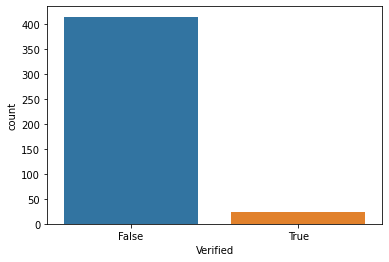

In [33]:
bar = sns.countplot(df['Verified'])

In [34]:
df['Verified'].value_counts()

False    415
True      24
Name: Verified, dtype: int64

In [35]:
df_verified = df.query('Verified == True')
df_verified['User'].value_counts()

INCPunjab          6
SwarajyaMag        3
INCIndia           2
SevadalPB          1
Partap_Sbajwa      1
SevadalHP          1
c_aashish          1
MahilaCongress     1
SyedHazeena        1
AmanKayamHai_ET    1
CNNnews18          1
pranavINC          1
BrahmMohindra      1
Sootradhar         1
prasannavishy      1
TheDeshBhakt       1
Name: User, dtype: int64

In [36]:
days = df['Date'].dt.day.tolist()
no_of_days = Counter(days)
no_of_days

Counter({15: 8, 16: 90, 17: 90, 18: 47, 19: 61, 20: 81, 21: 62})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Day')

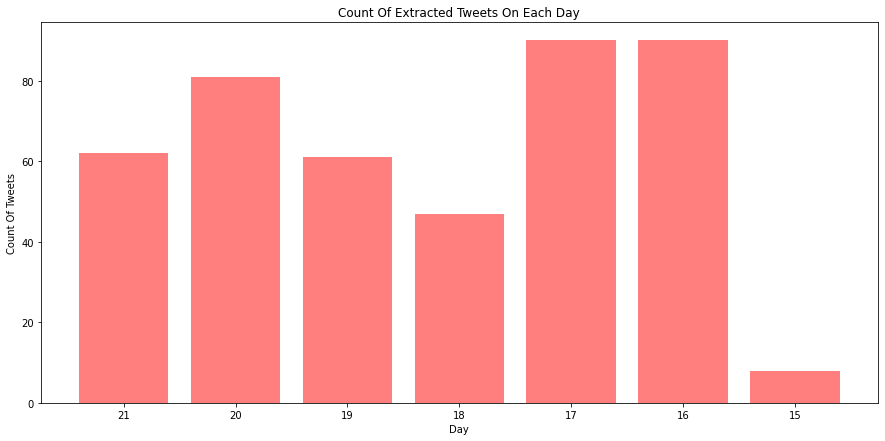

In [37]:
fig = plt.figure(figsize = (15,7))
plt.bar(range(len(no_of_days)), list(no_of_days.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_days)), list(no_of_days.keys()))
plt.xlabel("Day")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Day")

In [38]:
hours = df['Date'].dt.hour.tolist()
no_of_hours = Counter(hours)
no_of_hours

Counter({0: 3,
         1: 13,
         2: 16,
         3: 19,
         4: 19,
         5: 21,
         6: 17,
         7: 20,
         8: 19,
         9: 16,
         10: 28,
         11: 22,
         12: 24,
         13: 36,
         14: 35,
         15: 39,
         16: 30,
         17: 17,
         18: 14,
         19: 14,
         20: 8,
         21: 4,
         22: 4,
         23: 1})

Text(0.5, 1.0, 'Count Of Extracted Tweets On Each Hour')

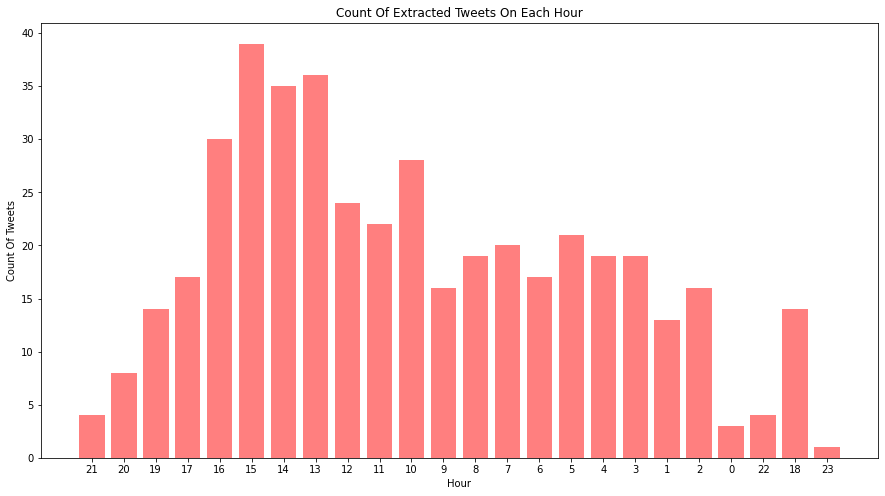

In [39]:
fig = plt.figure(figsize = (15,8))
plt.bar(range(len(no_of_hours)), list(no_of_hours.values()), align='center', alpha = 0.5,color = 'red')
plt.xticks(range(len(no_of_hours)), list(no_of_hours.keys()))
plt.xlabel("Hour")
plt.ylabel("Count Of Tweets")
plt.title("Count Of Extracted Tweets On Each Hour")

In [40]:
from wordcloud import WordCloud
tokenizer = TweetTokenizer()

In [41]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [42]:
stop_words = set(stopwords.words('english')) 
stop_words = list(stop_words)
print(stop_words)

['under', 'and', 'just', "aren't", 'down', 'how', "should've", 'some', "wouldn't", "shouldn't", 'their', 'do', 'myself', 'mustn', 're', 'shouldn', 'isn', 'having', 'but', "she's", 'why', 'these', 'being', 'each', 'only', 'have', 'because', 'needn', 'herself', 'did', 'own', "needn't", 'shan', 'those', 'where', 'hadn', "you've", 'yourself', 'a', 'ma', 'me', 'whom', 'themselves', 'from', 'other', 'then', 'until', 'after', 't', "didn't", "won't", 'wouldn', 'between', 'same', 'the', 'them', 'himself', 'won', 'ain', 'can', 'most', 'they', 'am', 'itself', 'nor', 'again', 'him', 'here', 'll', 'by', 'as', "mightn't", "isn't", "couldn't", 'with', 'haven', 'for', 'your', 'so', 'of', 's', 'off', 'm', 'against', 'such', 'y', 'her', "haven't", 'he', 'in', 'what', 'if', 'didn', 'or', 'she', 'not', 'all', 'who', 'should', "you're", 'it', 'which', 'hers', 'doing', 'had', "doesn't", 'over', 'ourselves', "it's", 'was', 'hasn', 'very', 'couldn', 'his', 'this', 'is', 'are', 'were', 'through', 'now', 'yours

In [43]:
df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: ' '.join(w for w in x.split() if w not in stop_words))   #Remove stopwords
df['Processed_Tweet']

0      good news thank farmers please dont fall gor p...
1      india paying price opposition hopeless politic...
2      present morbidity congress continues v r going...
3      thoko taali khopdi khali laughs like retard no...
4      agree congress tiny party front bjp bjps fight...
                             ...                        
434    tell regional parties gujarat mp rajasthan utt...
435    congress want booth capturing vote rigging win...
436    people punjab openly asking khalistan congress...
437    people punjab openly asking khalistan congress...
438             evm congress punjab maharastra aap delhi
Name: Processed_Tweet, Length: 439, dtype: object

In [44]:
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: tokenizer.tokenize(x))
df['Processed_Tweet']

0      [good, news, thank, farmers, please, dont, fal...
1      [india, paying, price, opposition, hopeless, p...
2      [present, morbidity, congress, continues, v, r...
3      [thoko, taali, khopdi, khali, laughs, like, re...
4      [agree, congress, tiny, party, front, bjp, bjp...
                             ...                        
434    [tell, regional, parties, gujarat, mp, rajasth...
435    [congress, want, booth, capturing, vote, riggi...
436    [people, punjab, openly, asking, khalistan, co...
437    [people, punjab, openly, asking, khalistan, co...
438      [evm, congress, punjab, maharastra, aap, delhi]
Name: Processed_Tweet, Length: 439, dtype: object

In [45]:
def lemmatize_stemming(text):
    stemmer=PorterStemmer()
    return stemmer.stem(text)
df['Processed_Tweet'] = df['Processed_Tweet'].apply(lambda x: [lemmatize_stemming(i) for i in x]) # stemming
df['Processed_Tweet']

0      [good, news, thank, farmer, pleas, dont, fall,...
1      [india, pay, price, opposit, hopeless, polit, ...
2      [present, morbid, congress, continu, v, r, go,...
3      [thoko, taali, khopdi, khali, laugh, like, ret...
4      [agre, congress, tini, parti, front, bjp, bjp,...
                             ...                        
434    [tell, region, parti, gujarat, mp, rajasthan, ...
435    [congress, want, booth, captur, vote, rig, win...
436    [peopl, punjab, openli, ask, khalistan, congre...
437    [peopl, punjab, openli, ask, khalistan, congre...
438      [evm, congress, punjab, maharastra, aap, delhi]
Name: Processed_Tweet, Length: 439, dtype: object

In [46]:

df['Processed_Tweet'] = df.Processed_Tweet.apply(lambda x: [i for i in x if len(i)>2])
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet
0,2020-11-21 21:45:18,1330266061900574722,False,@ChitleenKSethi Good news. Thank you farmers. ...,MannkibaatRajiv,,Twitter for iPhone,1,511,792,0,"[good, news, thank, farmer, pleas, dont, fall,..."
1,2020-11-21 21:06:39,1330256333132754949,False,#India paying price for opposition hopeless #p...,kalpak007,,Twitter Web App,2,408,268,0,"[india, pay, price, opposit, hopeless, polit, ..."
2,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a..."
3,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret..."
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,..."
...,...,...,...,...,...,...,...,...,...,...,...,...
434,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3845,4,"[tell, region, parti, gujarat, rajasthan, utta..."
435,2020-11-15 14:26:24,1327981280244363270,False,@TimesNow Congress want Booth capturing &amp; ...,Patil16950056,,Twitter for Android,0,2,6,0,"[congress, want, booth, captur, vote, rig, win..."
436,2020-11-15 14:26:17,1327981249227419654,False,Now some people in Punjab are openly asking fo...,abhik0786,भारत,Twitter for Android,0,132,1312,0,"[peopl, punjab, openli, ask, khalistan, congre..."
437,2020-11-15 14:22:20,1327980256842579968,False,Now some people in Punjab are openly asking fo...,TheSquind,,Twitter Web App,1193,35310,500,388,"[peopl, punjab, openli, ask, khalistan, congre..."


In [47]:
texts = []
texts = df.Processed_Tweet.apply(lambda x: [i for i in x] )
all_words = []
for i in texts:
    all_words.append(" ".join(i))
text = []
for i in texts:
    for j in i:
        text.append(j)
len(text)

7965

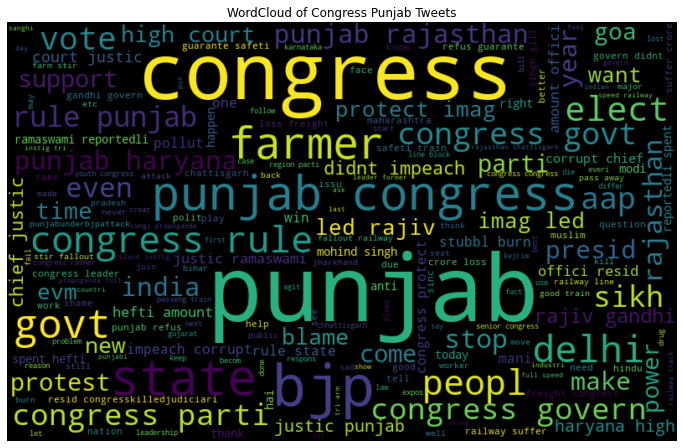

In [48]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(' '.join(text))
plt.figure(figsize = (12, 12), facecolor="None") 
plt.imshow(wordcloud,interpolation='bilinear') 
plt.axis("off") 
plt.title("WordCloud of Congress Punjab Tweets")
plt.show()

In [49]:
from textblob import TextBlob
pol=[]
for Tweet in all_words:
    blob = TextBlob(Tweet)
    pol.append(blob.sentiment.polarity)
len(pol)

439

In [50]:
len(text)

7965

In [51]:
positive=0
negative=0
neutral=0
for i in pol:
    if i>0:
        positive+=1
    elif i<0:
        negative+=1
    else:
        neutral+=1
print("Positive Tweets:",positive)
print("Negative Tweets:",negative)
print("Neutral Tweets",neutral)

Positive Tweets: 170
Negative Tweets: 95
Neutral Tweets 174


In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment_scores= []
for i in all_words:
    sentiment_scores.append([sid.polarity_scores(i)])

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [54]:
value = []
for i in sentiment_scores:
    for dict1 in i:
        value.append(list(dict1.values()))
sentimental_score_df = pd.DataFrame(data = value, columns = ['Negative','Neutral','Positive','Compound'])
sentimental_score_df

,Negative,Neutral,Positive,Compound
0,0.000,0.735,0.265,0.8074
1,0.399,0.601,0.000,-0.7430
2,0.043,0.776,0.180,0.6597
3,0.074,0.546,0.380,0.9186
4,0.172,0.693,0.135,-0.0258
...,...,...,...,...
434,0.224,0.717,0.058,-0.5719
435,0.152,0.606,0.242,0.3400
436,0.000,1.000,0.000,0.0000
437,0.191,0.809,0.000,-0.3818


In [55]:
sentimental_score_df['val'] = sentimental_score_df['Compound'].apply(lambda x: 'Neutral' if x == 0 else ('Positive' if x > 0 else 'Negative'))
sentimental_score_df.head()

,Negative,Neutral,Positive,Compound,val
0,0.000,0.735,0.265,0.8074,Positive
1,0.399,0.601,0.000,-0.7430,Negative
2,0.043,0.776,0.180,0.6597,Positive
3,0.074,0.546,0.380,0.9186,Positive
4,0.172,0.693,0.135,-0.0258,Negative


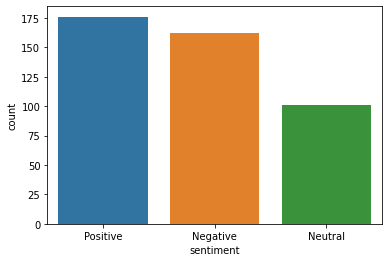

In [56]:
sent_count = pd.DataFrame.from_dict(Counter(sentimental_score_df['val']), orient = 'index').reset_index()
sent_count.columns = ['sentiment', 'count']

sns.barplot(y="count", x='sentiment', data=sent_count)

In [57]:
filepath = r"/content/Election-Prediction/StatewisePolitics/Punjab/Congress_Punjab.csv"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df.head(12)
len(emolex_df)

844

In [58]:
emotions={'positive':0, 'negative':0, 'surprise':0,'sadness':0,
          'anger':0,'joy':0,'negative':0,'trust':0,'fear':0,'anticipation':0,'disgust':0}

In [60]:
word_emotion=dict()
for i in range(0,844):
    emotion=emolex_df['emotion'][i]
    word=emolex_df['word'][i]
    association=emolex_df['association'][i]
    
    if word not in word_emotion:
        word_emotion[word]=dict()
    word_emotion[word][emotion]=association


In [61]:
from numpy import nan
nan == nan


False

In [ ]:
for i in range(0,3346):
    text=df['Tweet'][i]
    for j in text.split():
        if j in word_emotion:
            for k in word_emotion[j]:
                emotions[k]+=word_emotion[j][k]

KeyError: ignored

In [ ]:
emotions

{'anger': 0,
 'anticipation': 0,
 'disgust': 0,
 'fear': 0,
 'joy': 0,
 'negative': 0,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

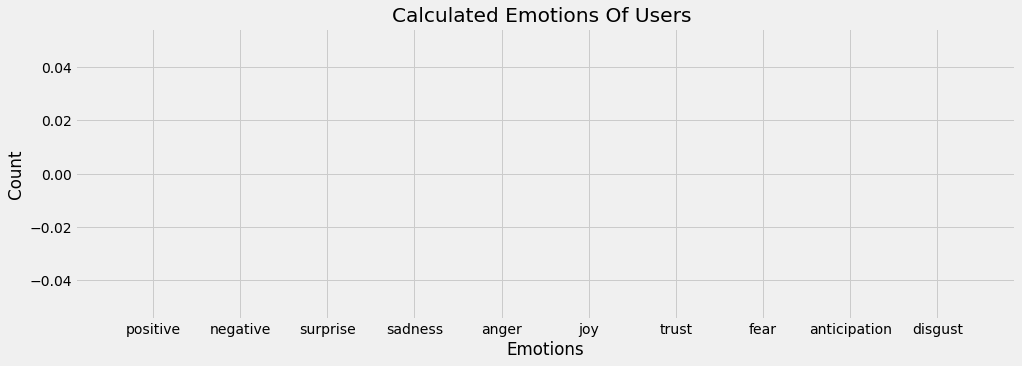

In [ ]:
plt.style.use('fivethirtyeight')
plt.rcParams["figure.figsize"] = [15,5]
plt.bar(list(emotions.keys()),list(emotions.values()),color='red',alpha = 0.6)
plt.xlabel('Emotions')
plt.ylabel('Count')
plt.title('Calculated Emotions Of Users ')
plt.show()

In [63]:
df.Location  = df.Location.fillna('India')
f = [i for i in df['Location'] if type(i) != str]
f

[]

In [64]:
df.Location = df.Location.apply(lambda x: x.replace('United States','USA'))
df.Location.value_counts()

                               140
India                           45
New Delhi, India                16
Mumbai, India                    9
swarg                            7
                              ... 
హైదరాబాద్                        1
India, Tamilnadu, Chennai        1
amritsar                         1
दिल्ली, भारत (Delhi, India)      1
1944-Tamil Nadu, India           1
Name: Location, Length: 169, dtype: int64

In [65]:
locations = []
locations_1 = []

locations = [i.split(',')[-1] for i in df['Location']]
locations_1 =  [i.split(',')[0] for i in df['Location']]
df['Processed_Location'] = locations_1
df

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location
0,2020-11-21 21:45:18,1330266061900574722,False,@ChitleenKSethi Good news. Thank you farmers. ...,MannkibaatRajiv,,Twitter for iPhone,1,511,792,0,"[good, news, thank, farmer, pleas, dont, fall,...",
1,2020-11-21 21:06:39,1330256333132754949,False,#India paying price for opposition hopeless #p...,kalpak007,,Twitter Web App,2,408,268,0,"[india, pay, price, opposit, hopeless, polit, ...",
2,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune
3,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,...",India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3845,4,"[tell, region, parti, gujarat, rajasthan, utta...",coimbatore
435,2020-11-15 14:26:24,1327981280244363270,False,@TimesNow Congress want Booth capturing &amp; ...,Patil16950056,,Twitter for Android,0,2,6,0,"[congress, want, booth, captur, vote, rig, win...",
436,2020-11-15 14:26:17,1327981249227419654,False,Now some people in Punjab are openly asking fo...,abhik0786,भारत,Twitter for Android,0,132,1312,0,"[peopl, punjab, openli, ask, khalistan, congre...",भारत
437,2020-11-15 14:22:20,1327980256842579968,False,Now some people in Punjab are openly asking fo...,TheSquind,,Twitter Web App,1193,35310,500,388,"[peopl, punjab, openli, ask, khalistan, congre...",


In [66]:
df1 = df
df1['sentiment'] = sentimental_score_df['val']

In [67]:
df1.to_csv('Location.csv',index = False)
df1['day'] = df.Date.dt.day
df1.head()

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day
0,2020-11-21 21:45:18,1330266061900574722,False,@ChitleenKSethi Good news. Thank you farmers. ...,MannkibaatRajiv,,Twitter for iPhone,1,511,792,0,"[good, news, thank, farmer, pleas, dont, fall,...",,Positive,21
1,2020-11-21 21:06:39,1330256333132754949,False,#India paying price for opposition hopeless #p...,kalpak007,,Twitter Web App,2,408,268,0,"[india, pay, price, opposit, hopeless, polit, ...",,Negative,21
2,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune,Positive,21
3,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta,Positive,21
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,...",India,Negative,21


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


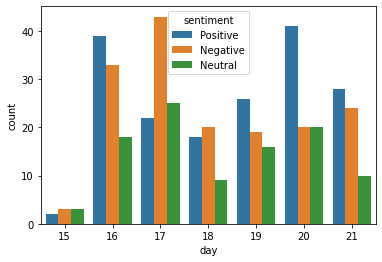

In [68]:
sns.countplot(df['day'],hue = df['sentiment'])

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [70]:
le = LabelEncoder() 
  
df1['sentiment_1']= le.fit_transform(df1['sentiment'])
df1

,Date,Tweet_id,Verified,Tweet,User,Location,Source,Likes,Followers,Following,Retweets,Processed_Tweet,Processed_Location,sentiment,day,sentiment_1
0,2020-11-21 21:45:18,1330266061900574722,False,@ChitleenKSethi Good news. Thank you farmers. ...,MannkibaatRajiv,,Twitter for iPhone,1,511,792,0,"[good, news, thank, farmer, pleas, dont, fall,...",,Positive,21,2
1,2020-11-21 21:06:39,1330256333132754949,False,#India paying price for opposition hopeless #p...,kalpak007,,Twitter Web App,2,408,268,0,"[india, pay, price, opposit, hopeless, polit, ...",,Negative,21,0
2,2020-11-21 20:14:20,1330243167736782850,False,If the present morbidity on Congress continues...,INDIAisGR8at70,"Pune, India",Twitter for Android,0,1820,2451,0,"[present, morbid, congress, continu, perish, a...",Pune,Positive,21,2
3,2020-11-21 20:13:46,1330243024220262401,False,@Mohit_ksr @moronhumor How about Thoko Taali k...,MitPatel1977,"Atlanta, GA",Twitter Web App,3,204,157,0,"[thoko, taali, khopdi, khali, laugh, like, ret...",Atlanta,Positive,21,2
4,2020-11-21 19:55:57,1330238539238416385,False,@sardesairajdeep @KapilSibal @IndiaToday I agr...,vertigobp,India,Twitter for iPhone,1,26,503,0,"[agre, congress, tini, parti, front, bjp, bjp,...",India,Negative,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,2020-11-15 16:08:59,1328007096789463041,False,@softsto38135836 @rkmarar9 @judedavid21 Tell m...,mukeshmarda,coimbatore,Twitter for Android,2,2603,3845,4,"[tell, region, parti, gujarat, rajasthan, utta...",coimbatore,Negative,15,0
435,2020-11-15 14:26:24,1327981280244363270,False,@TimesNow Congress want Booth capturing &amp; ...,Patil16950056,,Twitter for Android,0,2,6,0,"[congress, want, booth, captur, vote, rig, win...",,Positive,15,2
436,2020-11-15 14:26:17,1327981249227419654,False,Now some people in Punjab are openly asking fo...,abhik0786,भारत,Twitter for Android,0,132,1312,0,"[peopl, punjab, openli, ask, khalistan, congre...",भारत,Neutral,15,1
437,2020-11-15 14:22:20,1327980256842579968,False,Now some people in Punjab are openly asking fo...,TheSquind,,Twitter Web App,1193,35310,500,388,"[peopl, punjab, openli, ask, khalistan, congre...",,Negative,15,0


In [71]:
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(all_words).toarray()
y = df1['sentiment_1']

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# NEGATIVE == 0
# NEUTRAL == 1
# POSITIVE == 2

In [73]:
#X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size = 0.3, random_state = 0)

In [74]:
classifier_DT = DecisionTreeClassifier()
classifier_DT.fit(X_train, y_train)
y_pred_DT = classifier_DT.predict(X_test)

In [75]:
accuracy_score_DT = accuracy_score(y_test, y_pred_DT)
precision_score_DT = precision_score(y_test, y_pred_DT , average = 'micro')
recall_score_DT = recall_score(y_test, y_pred_DT , average = 'micro')
f1_score_DT = f1_score(y_test, y_pred_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_DT)
print("Precision Score: " , precision_score_DT)
print("Recall Score: " , recall_score_DT)
print("F1 Score: " , f1_score_DT)

Accuracy Score:  0.5151515151515151
Precision Score:  0.5151515151515151
Recall Score:  0.5151515151515151
F1 Score:  0.5151515151515151


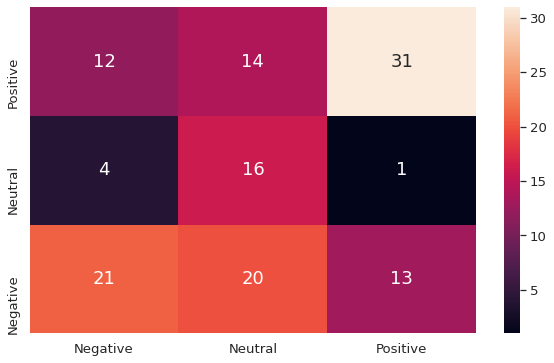

In [76]:
cm_DT = confusion_matrix(y_test, y_pred_DT)

      # neg # neutr  # pos
# pos #  232   65      1397
# neu #  87   1175     51
# neg # 1104   82      321

df_cm_DT = pd.DataFrame(cm_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [77]:
#Getting the parameters of the particular model 
classifier_DT.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [78]:
classifier_DT_opti = DecisionTreeClassifier() 

param_grid = {"max_depth" : [1,3,5,7],     #Setting the parameters for the model
               "criterion" : ["gini","entropy"],
              "min_samples_split" : [2,3,4],
              "max_leaf_nodes" : [7,8,9],
              "min_samples_leaf": [2,3,4],
             }

In [79]:
model_DT = model_selection.GridSearchCV(estimator=classifier_DT_opti, #GridSearch
                                    param_grid=param_grid, 
                                        cv=10)
model_DT.fit(X_train,y_train)
print(model_DT.best_score_) #Gives the best score of the model
print(model_DT.best_estimator_.get_params()) #Gives the best parameters

0.4880645161290323
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'max_leaf_nodes': 7, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [80]:
y_pred_model_DT = model_DT.predict(X_test)

accuracy_score_model_DT = accuracy_score(y_test, y_pred_model_DT)
precision_score_model_DT = precision_score(y_test, y_pred_model_DT , average = 'micro')
recall_score_model_DT = recall_score(y_test, y_pred_model_DT , average = 'micro')
f1_score_model_DT = f1_score(y_test, y_pred_model_DT , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_DT)
print("Precision Score: " , precision_score_model_DT)
print("Recall Score: " , recall_score_model_DT)
print("F1 Score: " , f1_score_model_DT)

Accuracy Score:  0.5151515151515151
Precision Score:  0.5151515151515151
Recall Score:  0.5151515151515151
F1 Score:  0.5151515151515151


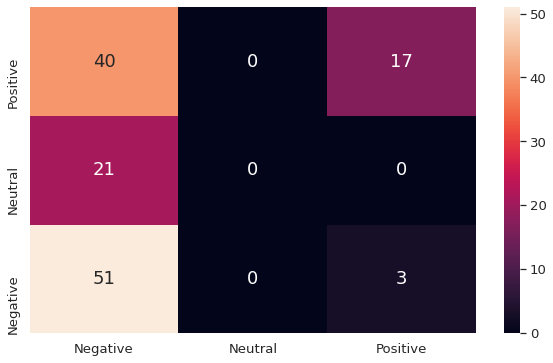

In [81]:
cm_model_DT = confusion_matrix(y_test, y_pred_model_DT)

df_cm_model_DT = pd.DataFrame(cm_model_DT, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_DT, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [82]:
classifier_RF = RandomForestClassifier()
classifier_RF.fit(X_train, y_train)
y_pred_RF = classifier_RF.predict(X_test)

In [83]:
accuracy_score_RF = accuracy_score(y_test, y_pred_RF)
precision_score_RF = precision_score(y_test, y_pred_RF , average = 'micro')
recall_score_RF = recall_score(y_test, y_pred_RF, average = 'micro')
f1_score_RF = f1_score(y_test, y_pred_RF, average = 'micro')
print("Accuracy Score: " , accuracy_score_RF)
print("Precision Score: " , precision_score_RF)
print("Recall Score: " , recall_score_RF)
print("F1 Score: " , f1_score_RF)

Accuracy Score:  0.5454545454545454
Precision Score:  0.5454545454545454
Recall Score:  0.5454545454545454
F1 Score:  0.5454545454545454


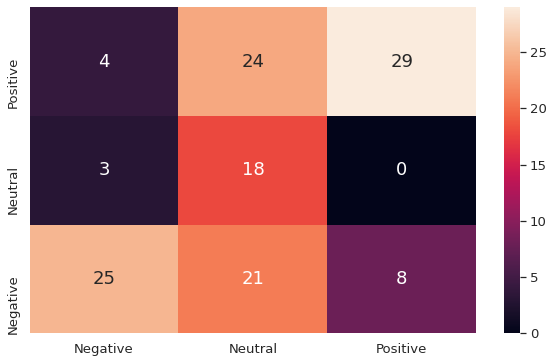

In [84]:
cm_RF = confusion_matrix(y_test, y_pred_RF)

df_cm_RF = pd.DataFrame(cm_RF, range(3), range(3))
categories = ['Negative','Neutral','Positive']
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [85]:
#Getting the parameters of the particular model 
classifier_RF.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [86]:
classifier_RF_opti = RandomForestClassifier()
param_grid = {"n_estimators": np.arange(100,1500,100), #Selecting the parameters
               "max_depth": np.arange(1,20),
               "criterion": ["gini","entropy"], 
              }

classifier_model_RF = model_selection.RandomizedSearchCV(estimator=classifier_RF_opti, #RandomizedSearch
                                    param_distributions=param_grid,
                                    n_iter=10,
                                    scoring='accuracy',
                                    verbose=10,
                                    n_jobs=1,
                                    cv=5)

classifier_model_RF.fit(X_train,y_train)
print(classifier_model_RF.best_score_) #Gives the best score of the model
print(classifier_model_RF.best_estimator_.get_params()) #Gives the best parameters of the model

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=400, max_depth=10, criterion=entropy ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, max_depth=10, criterion=entropy, score=0.597, total=   0.7s
[CV] n_estimators=400, max_depth=10, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=400, max_depth=10, criterion=entropy, score=0.629, total=   0.7s
[CV] n_estimators=400, max_depth=10, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=400, max_depth=10, criterion=entropy, score=0.672, total=   0.7s
[CV] n_estimators=400, max_depth=10, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=400, max_depth=10, criterion=entropy, score=0.689, total=   0.7s
[CV] n_estimators=400, max_depth=10, criterion=entropy ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=400, max_depth=10, criterion=entropy, score=0.590, total=   0.7s
[CV] n_estimators=1200, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.4s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=2, criterion=gini, score=0.419, total=   1.7s
[CV] n_estimators=1200, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.1s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=2, criterion=gini, score=0.500, total=   1.7s
[CV] n_estimators=1200, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=2, criterion=gini, score=0.623, total=   1.7s
[CV] n_estimators=1200, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    8.5s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=2, criterion=gini, score=0.443, total=   1.8s
[CV] n_estimators=1200, max_depth=2, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.4s remaining:    0.0s


[CV]  n_estimators=1200, max_depth=2, criterion=gini, score=0.426, total=   2.7s
[CV] n_estimators=200, max_depth=8, criterion=entropy ................
[CV]  n_estimators=200, max_depth=8, criterion=entropy, score=0.565, total=   0.5s
[CV] n_estimators=200, max_depth=8, criterion=entropy ................
[CV]  n_estimators=200, max_depth=8, criterion=entropy, score=0.565, total=   0.6s
[CV] n_estimators=200, max_depth=8, criterion=entropy ................
[CV]  n_estimators=200, max_depth=8, criterion=entropy, score=0.607, total=   0.6s
[CV] n_estimators=200, max_depth=8, criterion=entropy ................
[CV]  n_estimators=200, max_depth=8, criterion=entropy, score=0.607, total=   0.6s
[CV] n_estimators=200, max_depth=8, criterion=entropy ................
[CV]  n_estimators=200, max_depth=8, criterion=entropy, score=0.525, total=   0.6s
[CV] n_estimators=100, max_depth=6, criterion=gini ...................
[CV]  n_estimators=100, max_depth=6, criterion=gini, score=0.532, total=   0.3

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   43.1s finished


0.6612903225806452
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 700, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [87]:
y_pred_model_RF = classifier_model_RF.predict(X_test)

accuracy_score_model_RF = accuracy_score(y_test, y_pred_model_RF)
precision_score_model_RF = precision_score(y_test, y_pred_model_RF , average = 'micro')
recall_score_model_RF = recall_score(y_test, y_pred_model_RF , average = 'micro')
f1_score_model_RF = f1_score(y_test, y_pred_model_RF , average = 'micro')
print("Accuracy Score: " , accuracy_score_model_RF)
print("Precision Score: " , precision_score_model_RF)
print("Recall Score: " , recall_score_model_RF)
print("F1 Score: " , f1_score_model_RF)

Accuracy Score:  0.6363636363636364
Precision Score:  0.6363636363636364
Recall Score:  0.6363636363636364
F1 Score:  0.6363636363636364


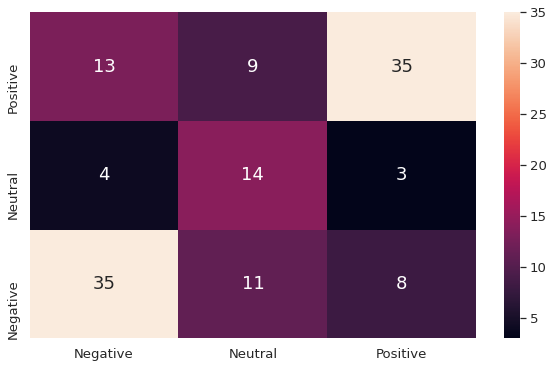

In [88]:
cm_model_RF = confusion_matrix(y_test, y_pred_model_RF)

df_cm_model_RF = pd.DataFrame(cm_model_RF, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_RF, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [89]:
classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)
y_pred_NB = classifier_NB.predict(X_test)

accuracy_score_NB = accuracy_score(y_test, y_pred_NB)
precision_score_NB = precision_score(y_test, y_pred_NB , average = 'micro')
recall_score_NB = recall_score(y_test, y_pred_NB, average = 'micro')
f1_score_NB = f1_score(y_test, y_pred_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_NB)
print("Precision Score: " , precision_score_NB)
print("Recall Score: " , recall_score_NB)
print("F1 Score: " , f1_score_NB)

Accuracy Score:  0.5984848484848485
Precision Score:  0.5984848484848485
Recall Score:  0.5984848484848485
F1 Score:  0.5984848484848485


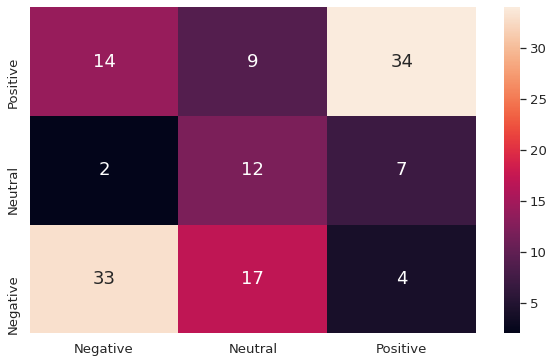

In [90]:
cm_NB = confusion_matrix(y_test, y_pred_NB)

df_cm_NB = pd.DataFrame(cm_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

In [91]:
#Getting the parameters of the particular model 
classifier_NB.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [92]:
classifier_NB_opti = MultinomialNB() #Using the MultinomialNB
param_grid = {'alpha':[1,2,3,4], } #Selecting the parameters

classifier_model_NB = model_selection.GridSearchCV(estimator=classifier_NB_opti, #GridSearch
                                    param_grid=param_grid,
                                        cv=10)
classifier_model_NB.fit(X_train,y_train)
print(classifier_model_NB.best_score_) #Gives the best score of the model
print(classifier_model_NB.best_estimator_.get_params()) #Gives the best parameters of the model

0.6506451612903226
{'alpha': 1, 'class_prior': None, 'fit_prior': True}


In [93]:
y_pred_model_NB = classifier_model_NB.predict(X_test)

accuracy_score_model_NB = accuracy_score(y_test, y_pred_model_NB)
precision_score_model_NB = precision_score(y_test, y_pred_model_NB , average = 'micro')
recall_score_model_NB = recall_score(y_test, y_pred_model_NB , average = 'micro')
f1_score_model_NB = f1_score(y_test, y_pred_model_NB, average = 'micro')
print("Accuracy Score: " , accuracy_score_model_NB)
print("Precision Score: " , precision_score_model_NB)
print("Recall Score: " , recall_score_model_NB)
print("F1 Score: " , f1_score_model_NB)

Accuracy Score:  0.5984848484848485
Precision Score:  0.5984848484848485
Recall Score:  0.5984848484848485
F1 Score:  0.5984848484848485


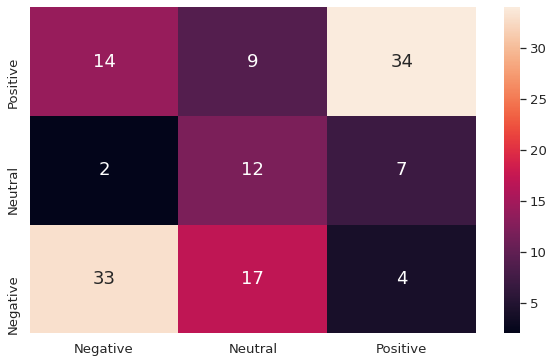

In [94]:
cm_model_NB = confusion_matrix(y_test, y_pred_model_NB)

df_cm_model_NB = pd.DataFrame(cm_model_NB, range(3), range(3))
plt.figure(figsize=(10,6))
categories = ['Negative','Neutral','Positive']
sns.set(font_scale=1.2) # for label size
sns.heatmap(df_cm_model_NB, annot=True, annot_kws={"size": 18}, xticklabels = categories,
            yticklabels = categories ,fmt="d") # font size
plt.ylim(0, 3)
plt.show()

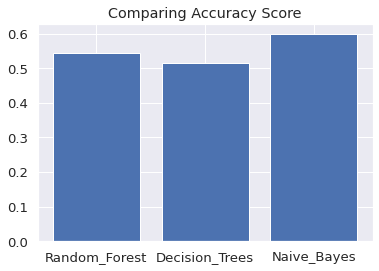

In [95]:
Accuracy = [accuracy_score_RF, accuracy_score_DT, accuracy_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Accuracy_pos = np.arange(len(Methods))
plt.bar(Accuracy_pos, Accuracy)
plt.xticks(Accuracy_pos, Methods)
plt.title('Comparing Accuracy Score')
plt.show()

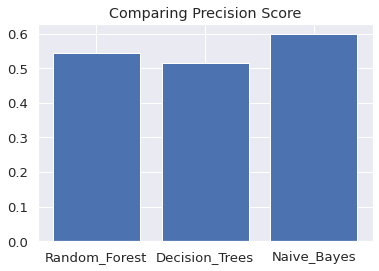

In [96]:
Precision = [precision_score_RF, precision_score_DT, precision_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Precision_pos = np.arange(len(Methods))
plt.bar(Precision_pos, Precision)
plt.xticks(Precision_pos, Methods)
plt.title('Comparing Precision Score')
plt.show()

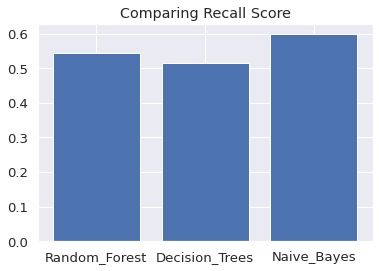

In [97]:
Recall = [recall_score_RF, recall_score_DT, recall_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
Recall_pos = np.arange(len(Methods))
plt.bar(Recall_pos, Recall)
plt.xticks(Recall_pos, Methods)
plt.title('Comparing Recall Score')
plt.show()

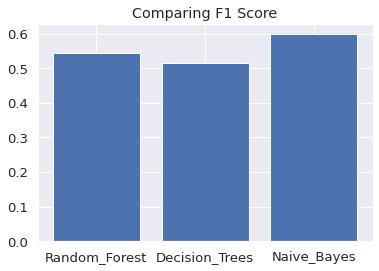

In [98]:

F1 = [f1_score_RF,f1_score_DT,f1_score_model_NB]
Methods = ['Random_Forest', 'Decision_Trees', 'Naive_Bayes']
F1_pos = np.arange(len(Methods))
plt.bar(F1_pos, F1)
plt.xticks(F1_pos, Methods)
plt.title('Comparing F1 Score')
plt.show()